# *📊 Employee Attrition - Exploratory Data Analysis (EDA)*

---

## *Author*  
**Kfir Tayar** 

## *Notebook Overview*  
- Create Data Protocol 
- Create AutoViz report  
- Plot graphs of the Categorical & Numerical features
- Check skewness for continuous features
- Perform Pearson Correlation Test
- Perform AVOVA Test  
- Perform Chi-Square Test

In [1]:
# Import Libraries & Modules
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Add the path to the utils directory
sys.path.append(os.path.abspath('../utils'))

#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

from eda_utils import data_protocol, display_png_plots, skewness_report, chi_square_matrix

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


### Load Data Set

In [3]:
processed_df = pd.read_pickle("../Data/processed_employee_data_20250325.pkl")

In [5]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    74498 non-null  category
 1   Years at Company          74498 non-null  int64   
 2   Job Role                  74498 non-null  category
 3   Monthly Income            74498 non-null  int64   
 4   Work-Life Balance         74498 non-null  category
 5   Job Satisfaction          74498 non-null  category
 6   Performance Rating        74498 non-null  category
 7   Number of Promotions      74498 non-null  category
 8   Overtime                  74498 non-null  category
 9   Distance from Home        74498 non-null  int64   
 10  Education Level           74498 non-null  category
 11  Marital Status            74498 non-null  category
 12  Number of Dependents      74498 non-null  category
 13  Job Level                 74498 non-null  cate

### Data Protocol

In [8]:
# Create data protocol xlsx files
data_protocol(processed_df, folder='data', df_name='Employee_Attrition')

Creating Employee_Attrition_datatype
Employee_Attrition_Max
Employee_Attrition_Min
Employee_Attrition_Missing_Values
and Employee_Attrition_Unique files...

Data Protocol process is done!
Saved path: data/data_protocol


### AutoVis report

In [11]:
saving_plots_path = f"../data/autovis_plots/"
os.makedirs(saving_plots_path, exist_ok=True)

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="Attrition",
    dfte=processed_df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=500,
    max_cols_analyzed=22,
    save_plot_dir=saving_plots_path
)

    Since nrows is smaller than dataset, loading random sample of 500 rows into pandas...
Shape of your Data Set loaded: (500, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['Years at Company', 'Monthly Income', 'Distance from Home']
    String-Categorical Columns: []
    Factor-Categorical Columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', '

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Years at Company,int64,0.000000,9,1.000000,49.000000,Column has 16 outliers greater than upper bound (42.62) or lower than lower bound(-14.38). Cap them or remove them.
Monthly Income,int64,0.000000,96,2386.000000,14210.000000,Column has 2 outliers greater than upper bound (13223.88) or lower than lower bound(930.88). Cap them or remove them.
Distance from Home,int64,0.000000,19,1.000000,99.000000,No issue
Gender,category,0.000000,0,,,No issue
Job Role,category,0.000000,1,,,No issue
Work-Life Balance,category,0.000000,0,,,No issue
Job Satisfaction,category,0.000000,0,,,No issue
Performance Rating,category,0.000000,0,,,No issue
Number of Promotions,category,0.000000,1,,,No issue
Overtime,category,0.000000,0,,,No issue


Total Number of Scatter Plots = 6
Could not draw some Heat Maps could not convert string to float: 'Stayed'
All Plots are saved in ../data/autovis_plots/Attrition
Time to run AutoViz = 11 seconds 


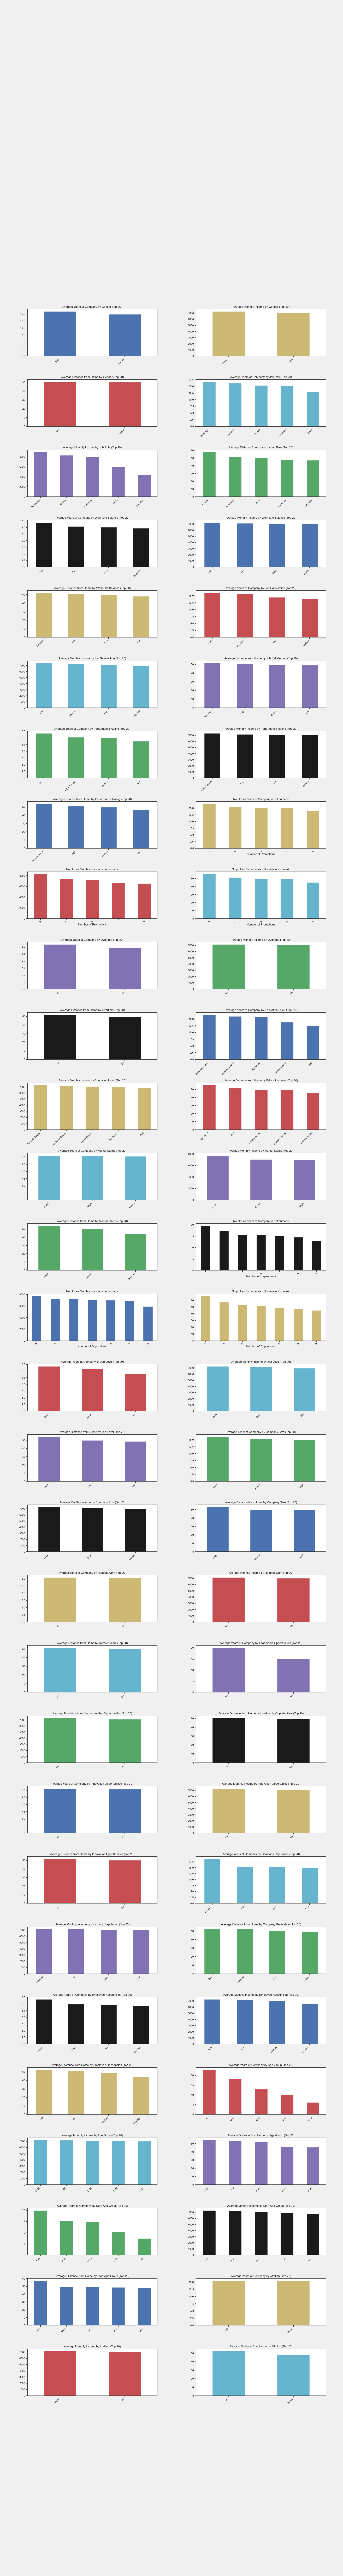

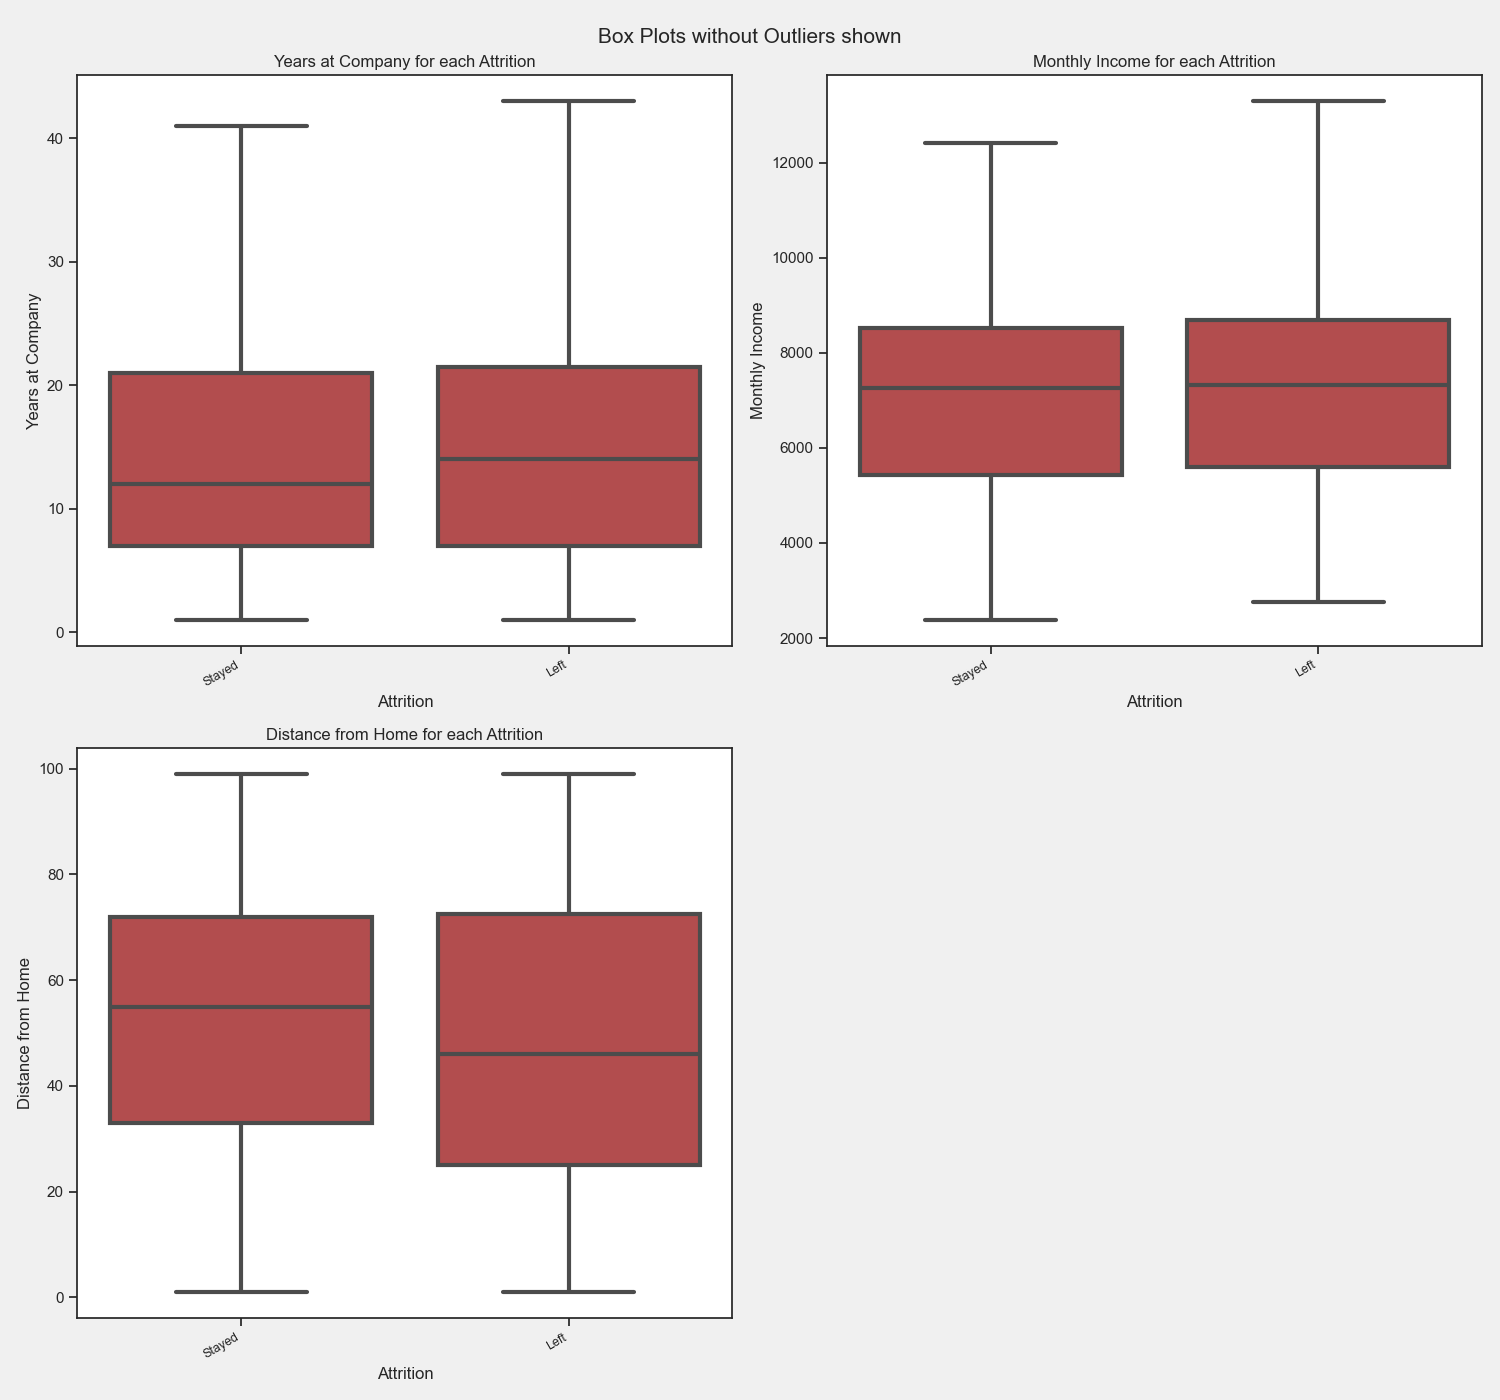

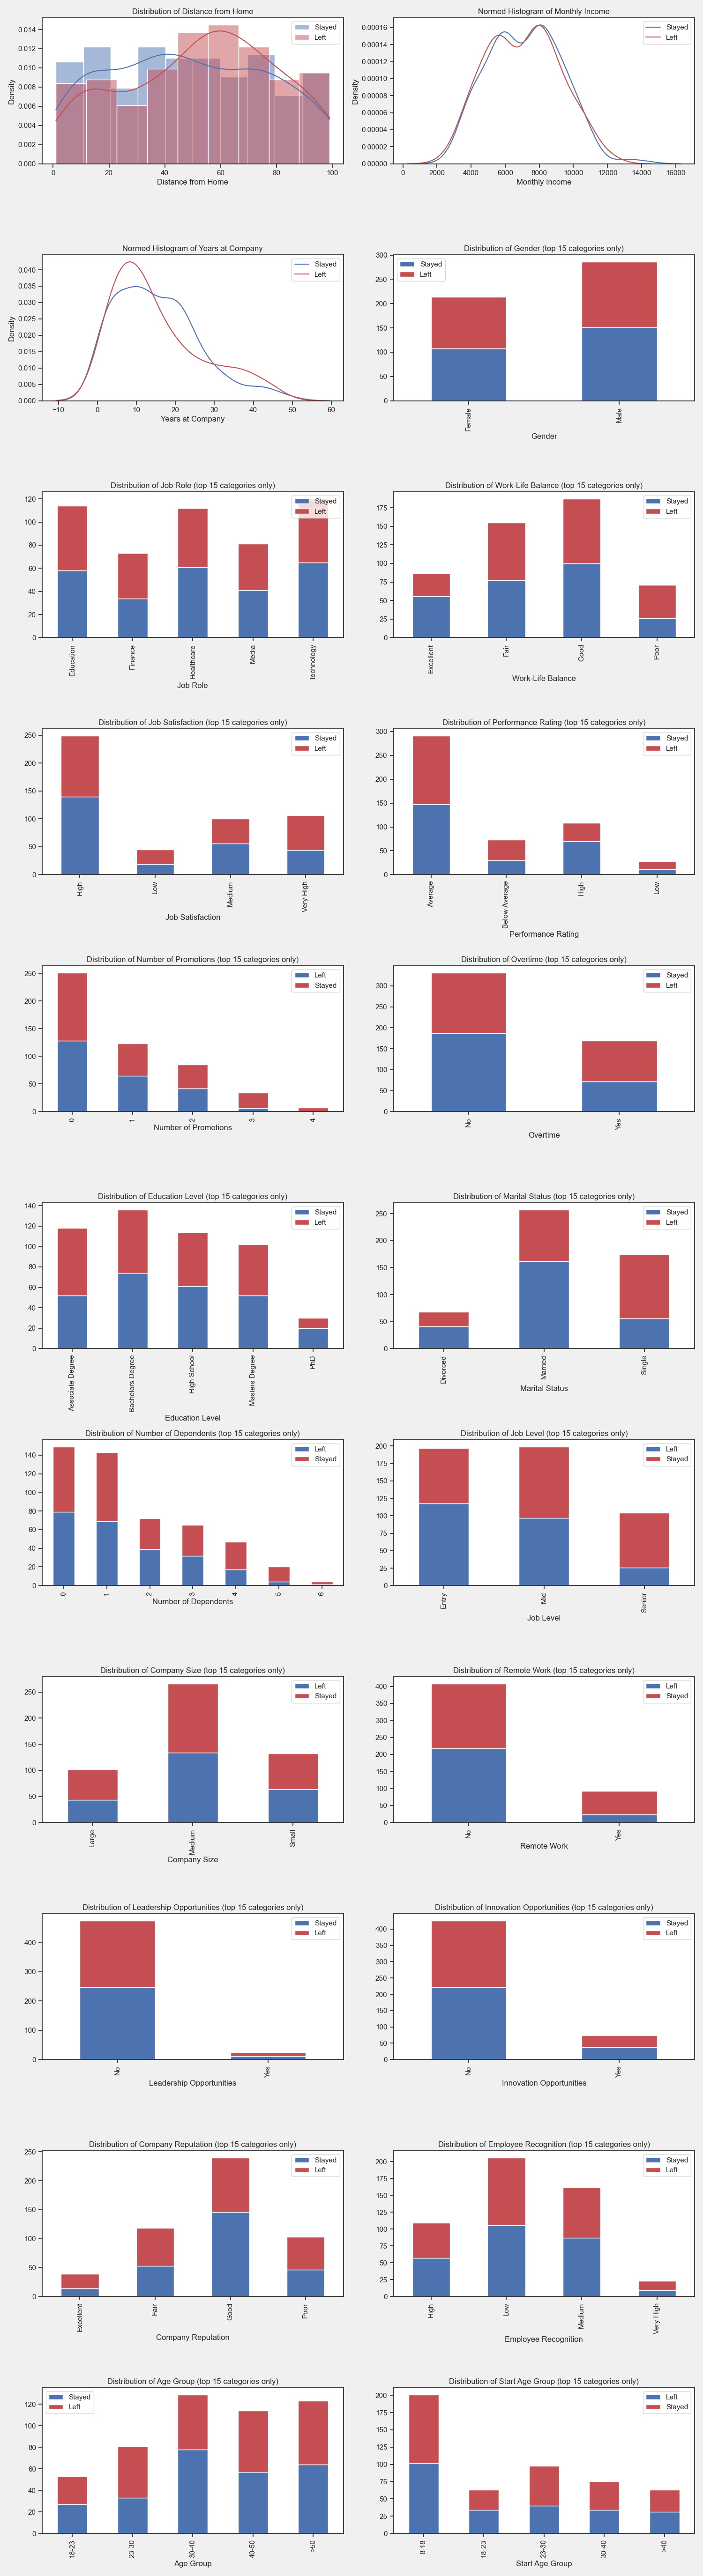

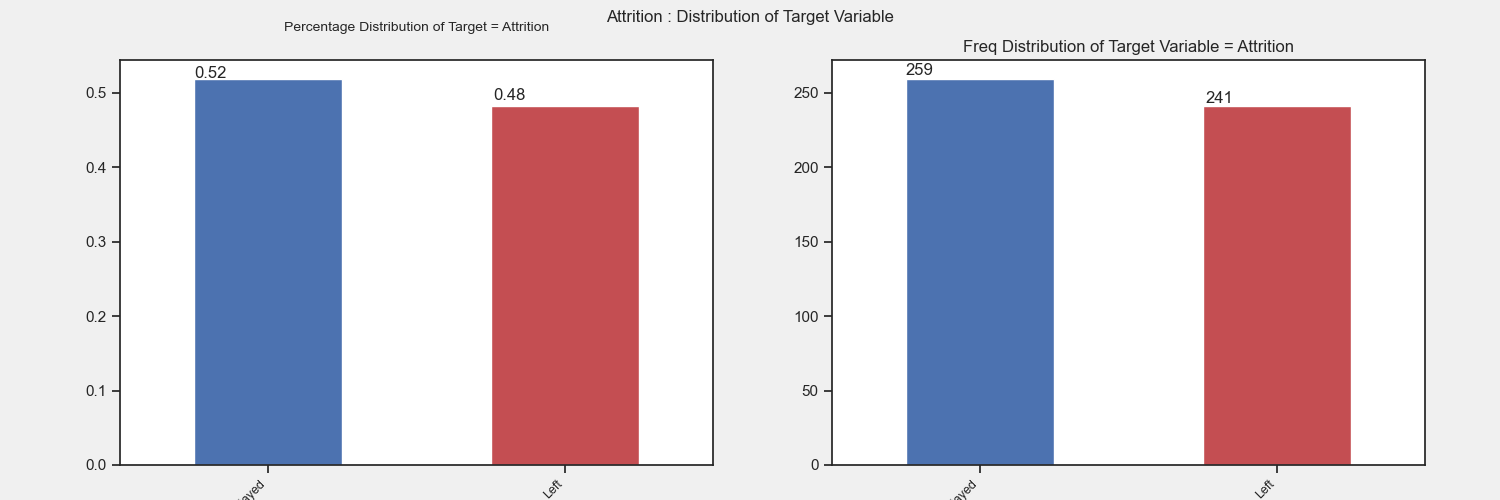

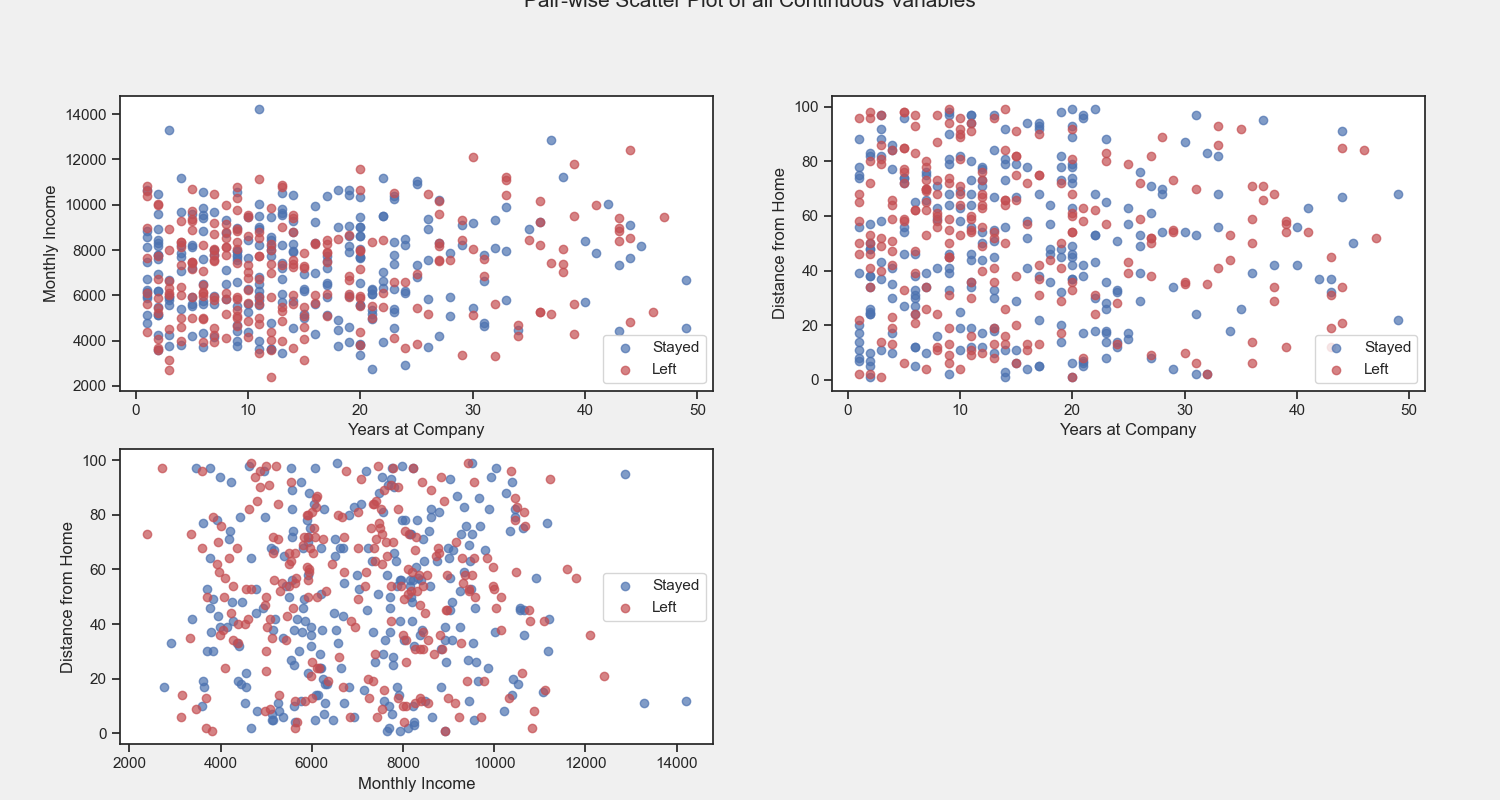

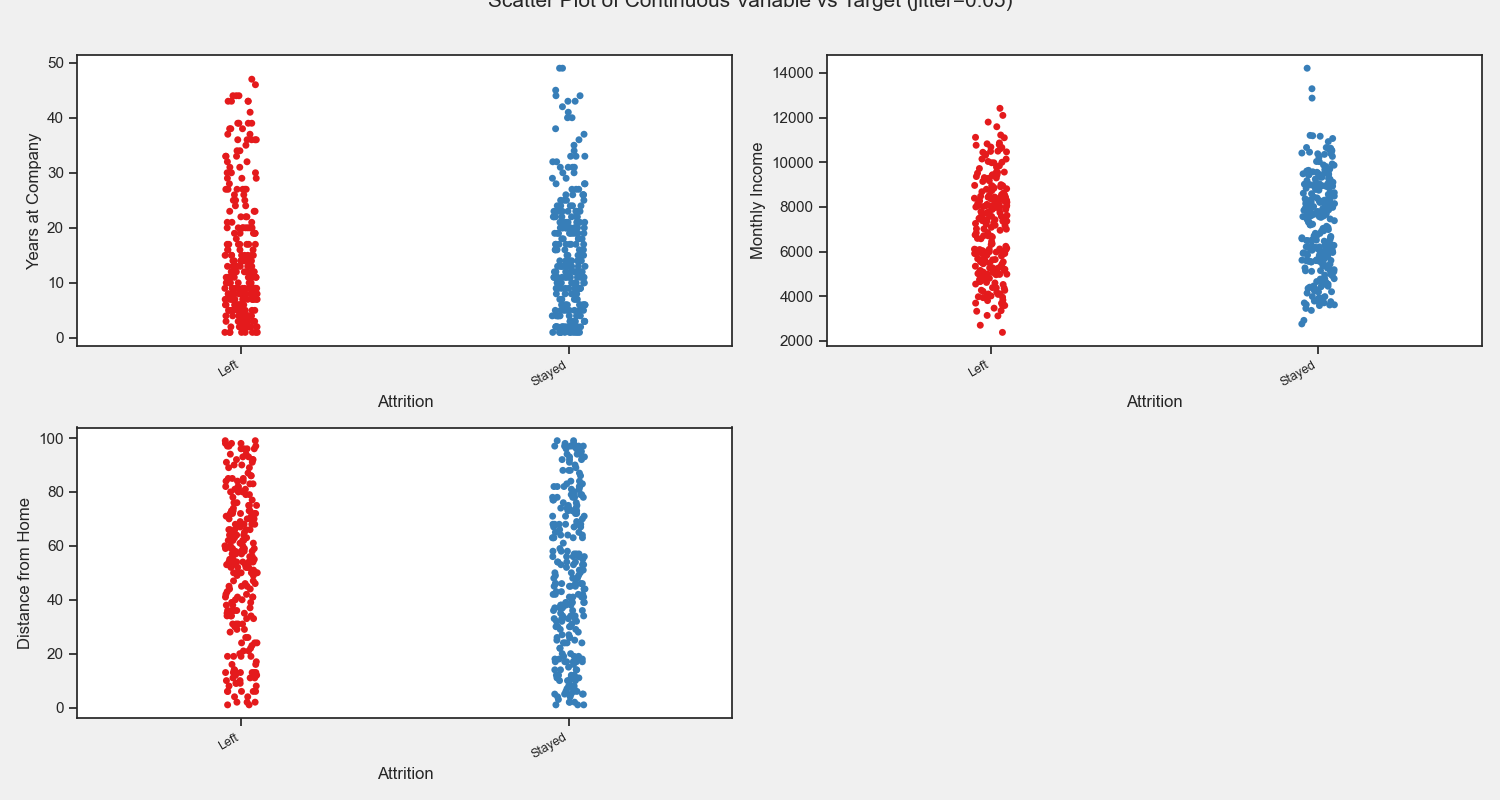

In [13]:
# Display the png images from the saved path
display_png_plots(path=saving_plots_path, target_feature="Attrition")

In [17]:
processed_df.describe().round(2)

,Years at Company,Monthly Income,Distance from Home
count,74498.00,74498.00,74498.00
mean,15.72,7299.38,49.99
std,11.22,2152.51,28.51
min,1.00,1226.00,1.00
25%,7.00,5652.00,25.00
50%,13.00,7348.00,50.00
75%,23.00,8876.00,75.00
max,51.00,16149.00,99.00


### Ratio of target feature

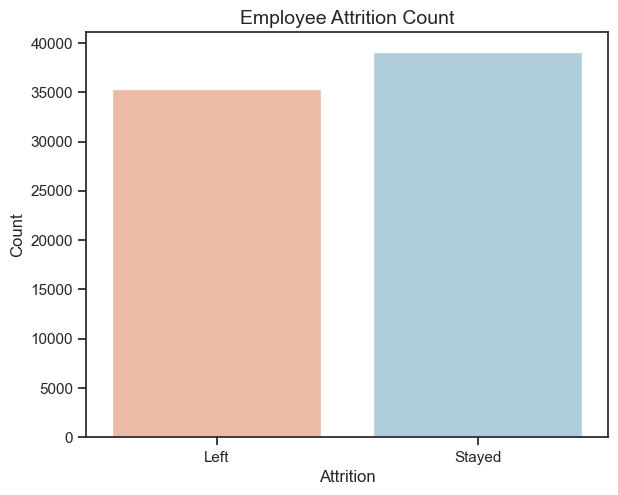

In [25]:
plt.figure(figsize=(6, 5))

# Create the count plot
sns.countplot(x=processed_df["Attrition"], palette="RdBu")

# Add title and labels
plt.title("Employee Attrition Count", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

### Count plots of the categorical features

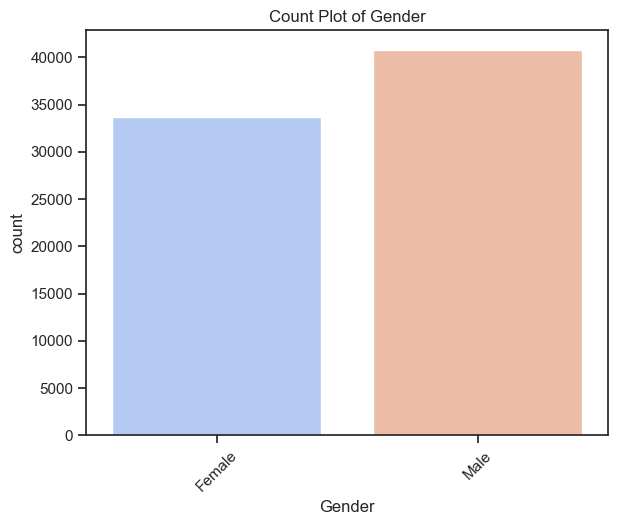

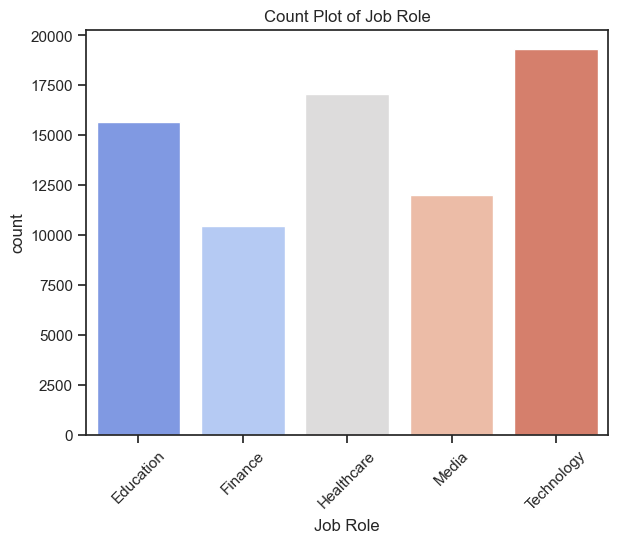

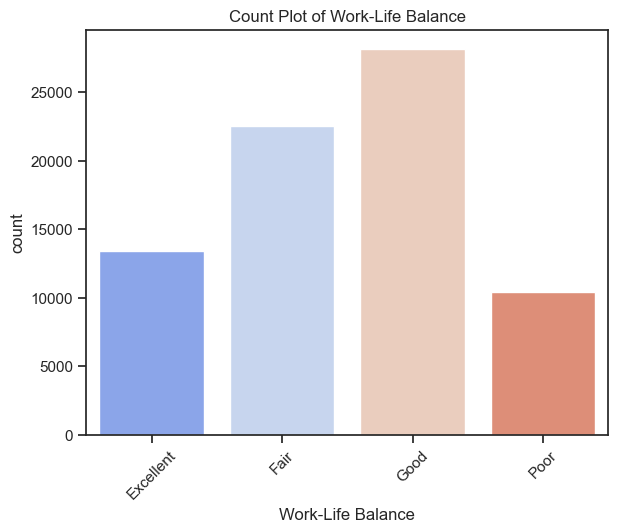

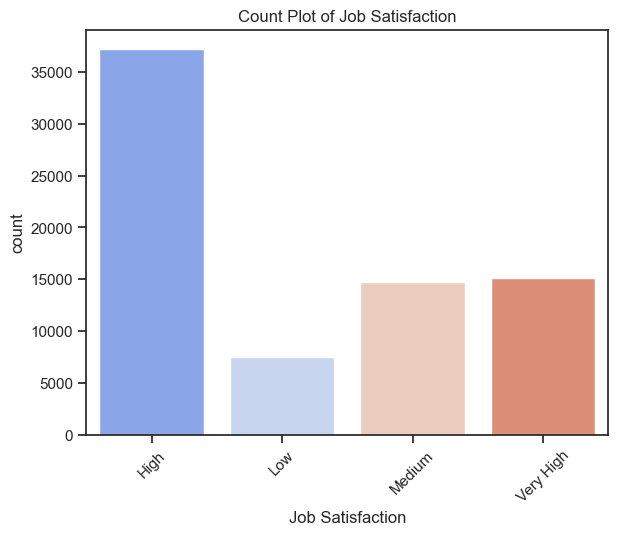

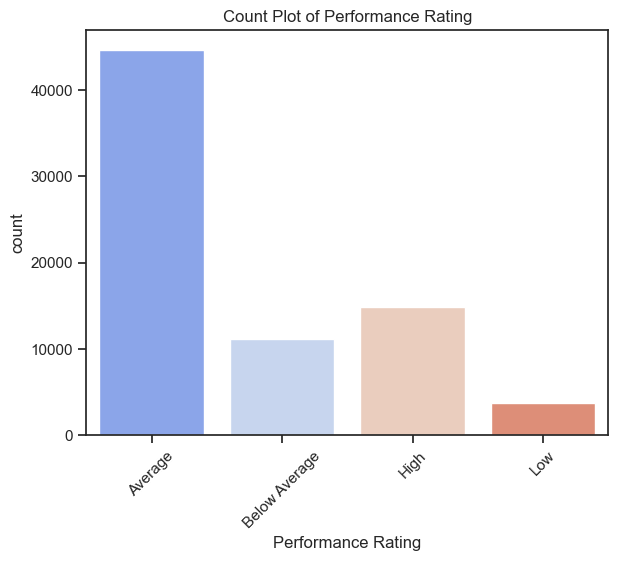

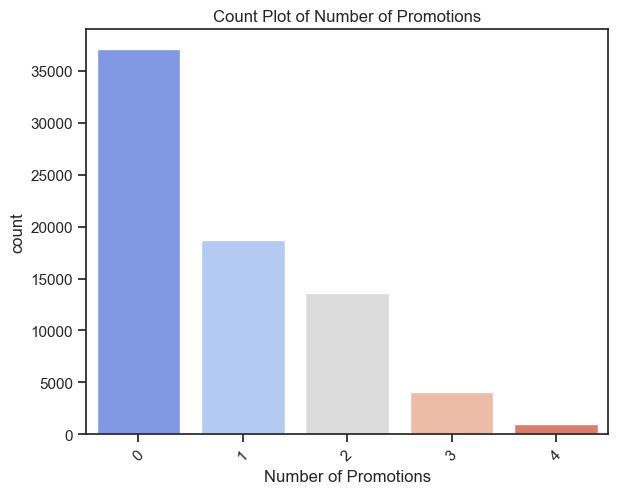

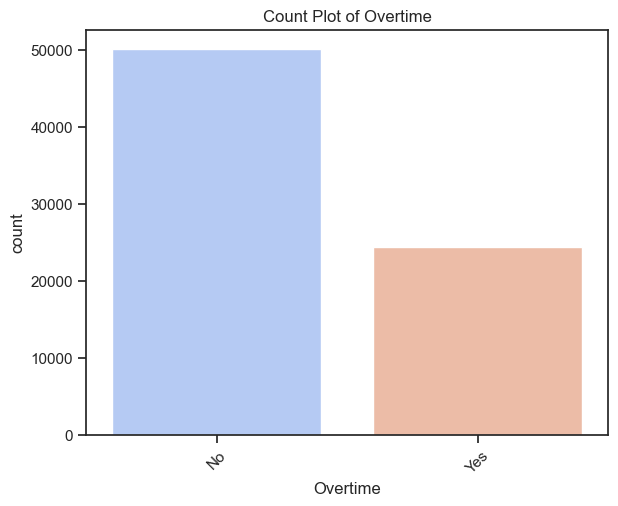

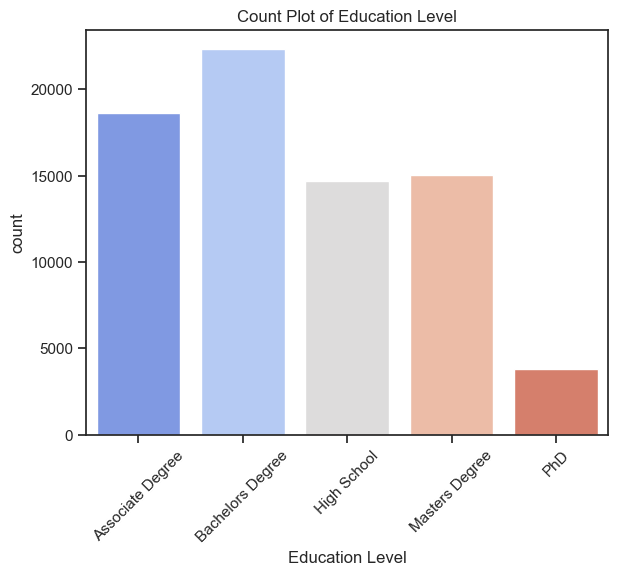

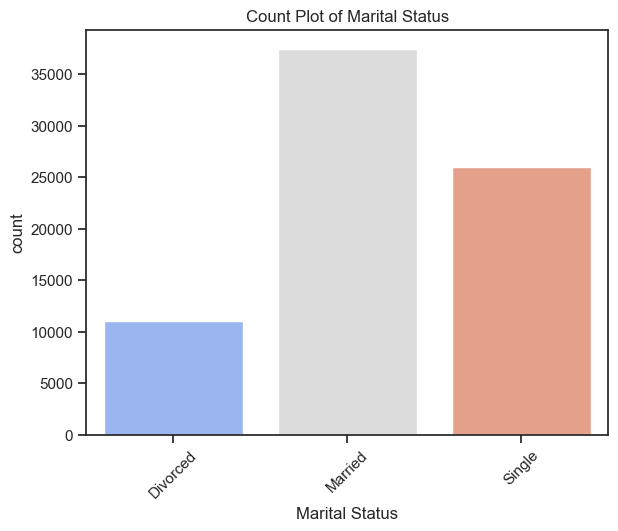

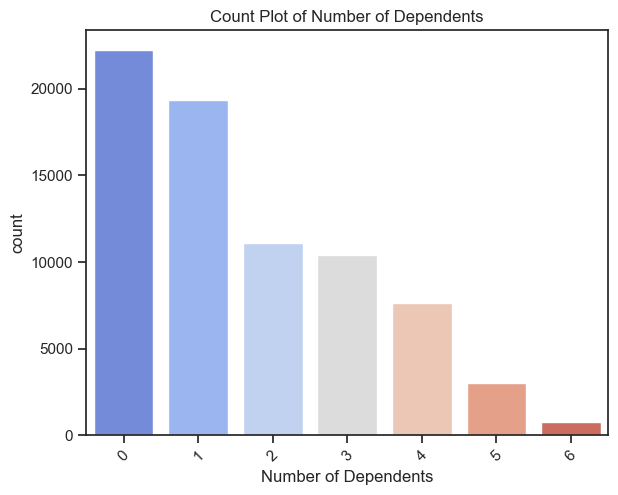

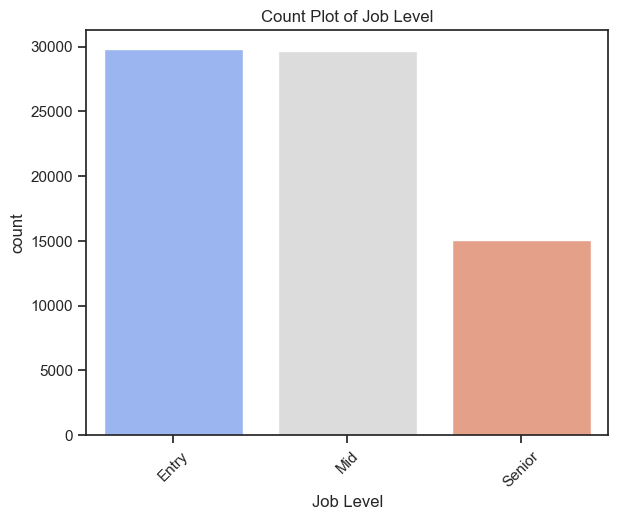

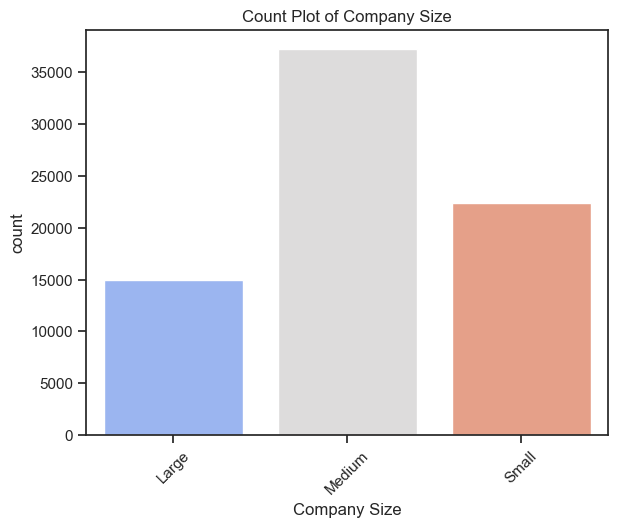

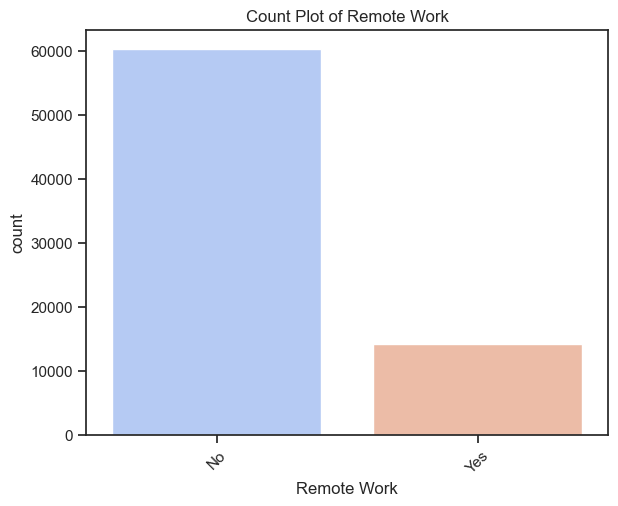

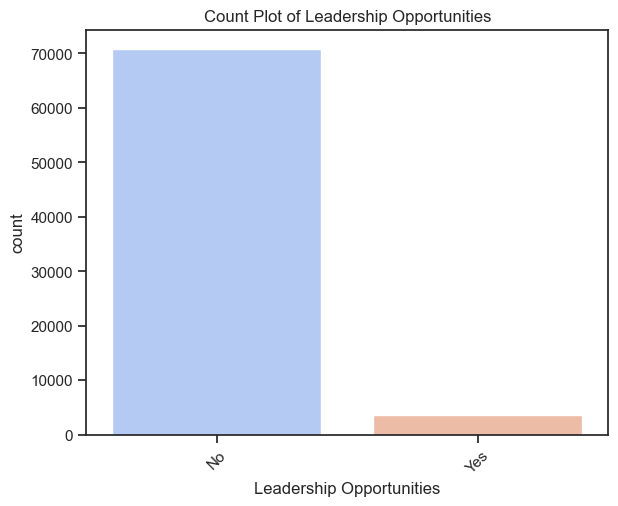

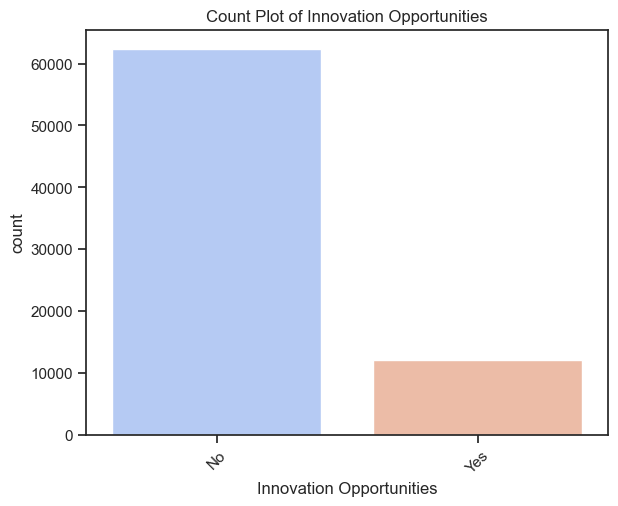

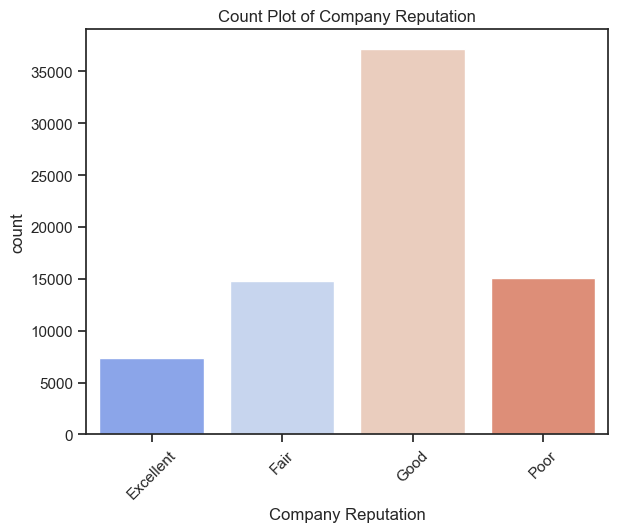

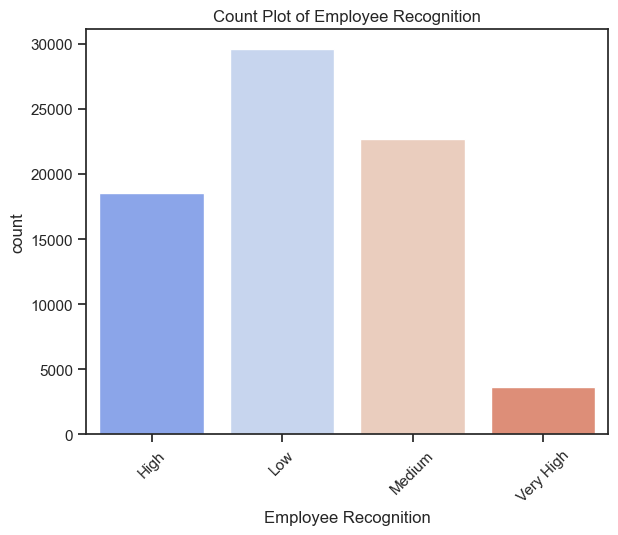

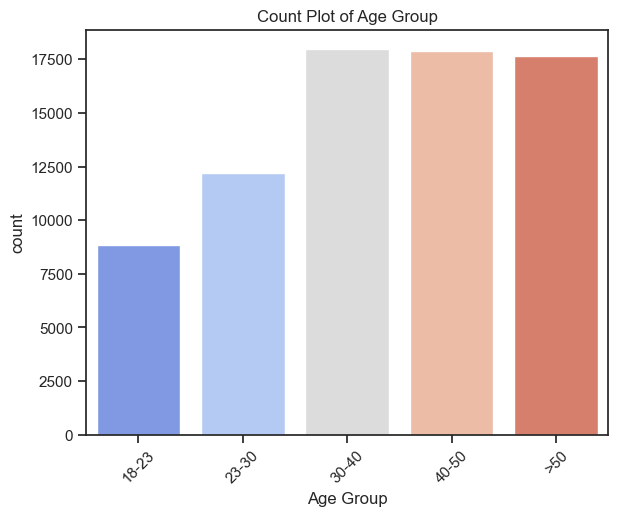

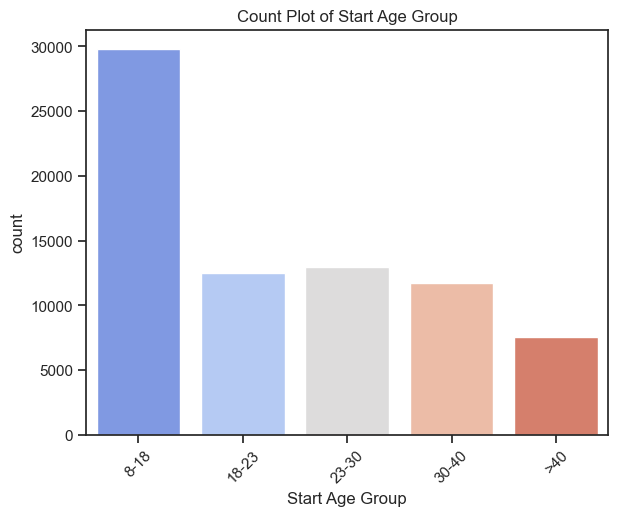

In [27]:
# List of columns to exclude
exclude_columns = ['Attrition']

# Loop through all the columns in the dataframe
for col in processed_df.select_dtypes(include=['category']).columns:
    if col not in exclude_columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x=col, data=processed_df, palette="coolwarm")  # You can change the palette here
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
        plt.show()


### Histograms plots of the continues features

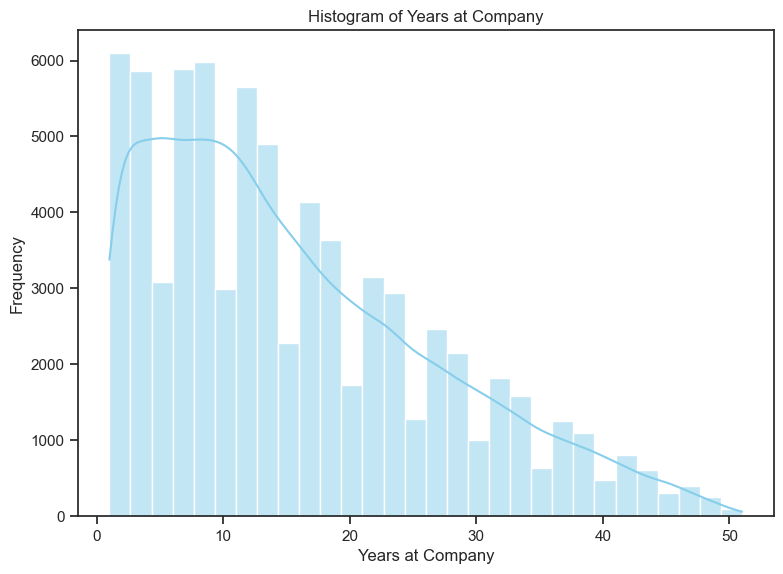

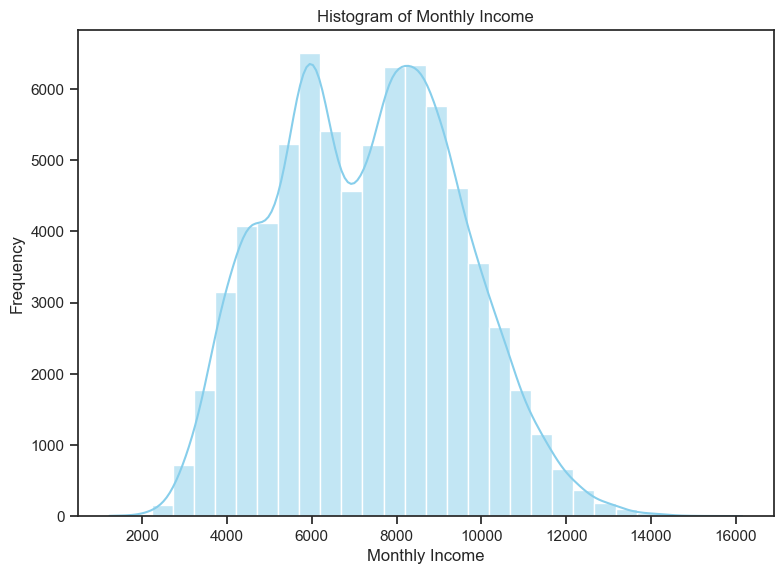

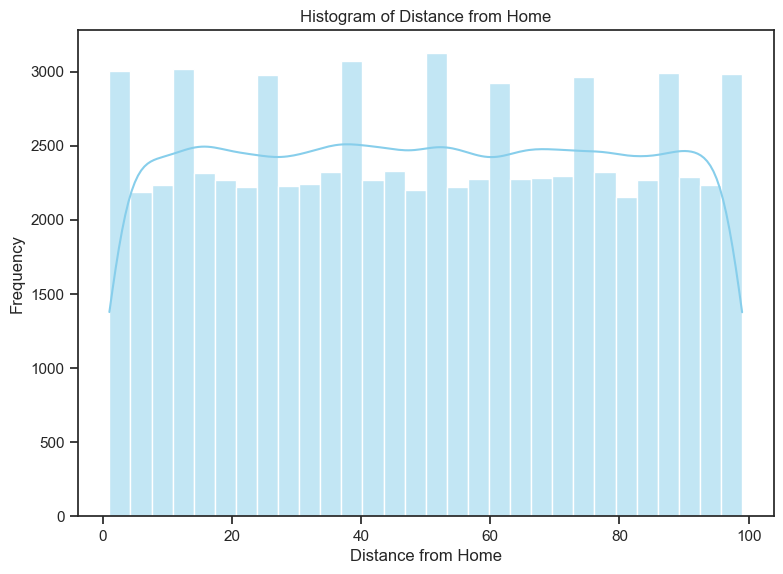

In [35]:
# Select the continuous features (numeric columns)
continuous_features = processed_df.select_dtypes(include=['number']).columns

# Plot histograms for continuous features
for col in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(processed_df[col], kde=True, color='skyblue', bins=30)  # KDE (Kernel Density Estimation) adds a smooth curve
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Chack the skewnees of the continues features

In [31]:
# Display a Skewnees report for the continued features
skewnees_df = skewness_report(processed_df, continuous_features)
skewnees_df

,skewness
Years at Company,0.789908
Monthly Income,0.118312
Distance from Home,0.001765


As we can see all the continuous features are considered normally distributed

### Correlation

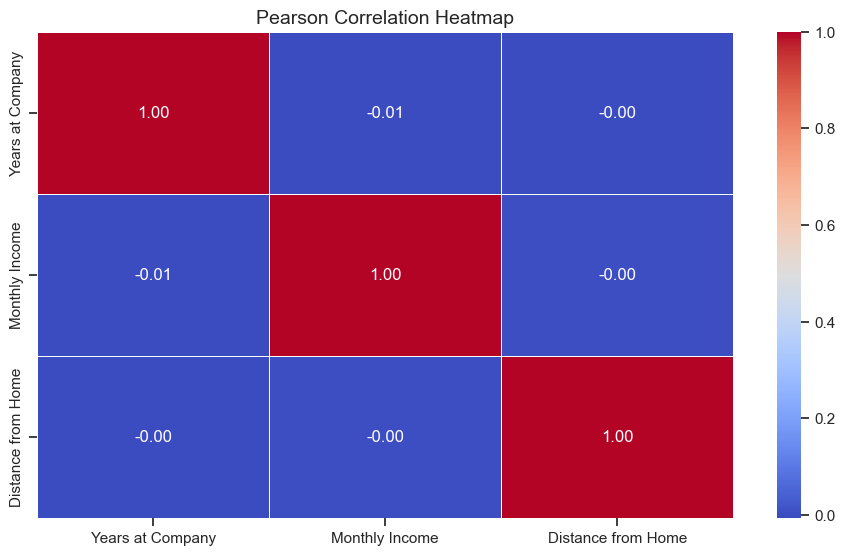

In [29]:
# Compute the correlation matrix
corr_matrix = processed_df[continuous_features].corr(method="pearson")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Pearson Correlation Heatmap", fontsize=14)
plt.show()

There is no strong positive or negative correlation

### ANOVA
Since all the features are normally distributed, I want to take a look at the ANOVA test 
between the continuous features.

In [39]:
groups = [processed_df[group] for group in continuous_features]

# performe ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"f-stat: {f_stat}")
print(f"p-value: {p_value}")

f-stat: 848842.997738254
p-value: 0.0


Since the p-value lower than 0.05, we can conclude that there is a significant difference between the group means.

### Perform ANOVA related to the target feature  

For each continuous feature, check if there is a significant difference between employees who stayed and those who left.

In [43]:
grouped_data = processed_df.groupby("Attrition")

# Selecting only numerical columns
groups = continuous_features

# Performing ANOVA for each numerical feature
anova_results = []
for col in groups:
    values = [group[col] for name, group in grouped_data]  # Extract values for each Attrition group
    f_stat, p_value = stats.f_oneway(*values)  # Perform ANOVA
    anova_results.append([col, f_stat, p_value, 'Yes' if p_value < 0.05 else 'No'])

# Convert results into a DataFrame
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-Stat', 'P-Value', 'Significant'])

# Set Feature as the index
anova_df.set_index('Feature', inplace=True)

anova_df

,F-Stat,P-Value,Significant
Feature,,,
Years at Company,319.884927,2.165733e-71,Yes
Monthly Income,8.509790,3.533463e-03,Yes
Distance from Home,661.774801,2.659524e-145,Yes


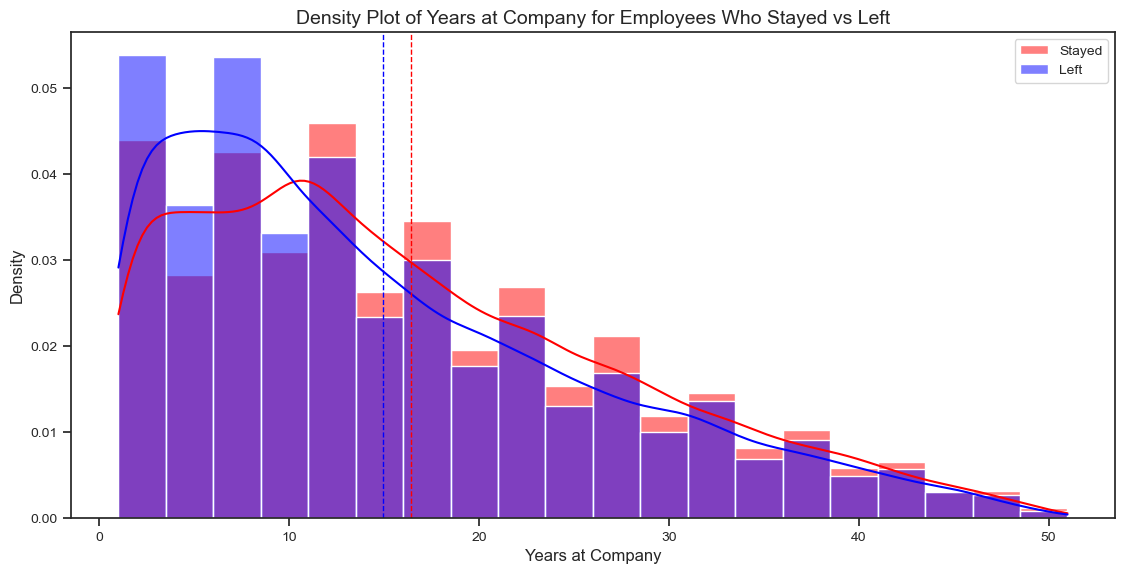

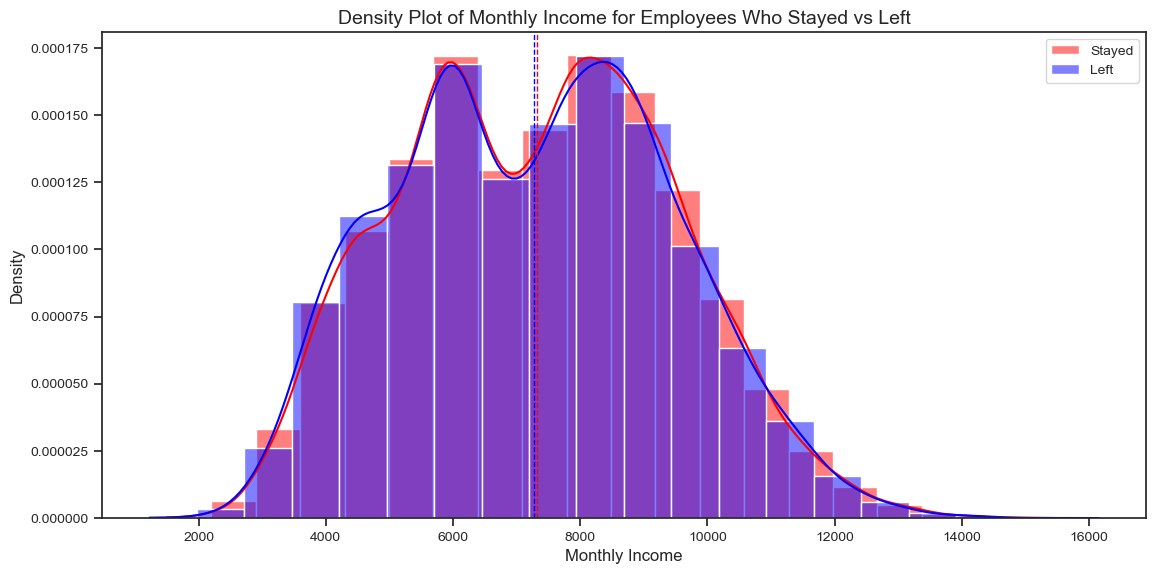

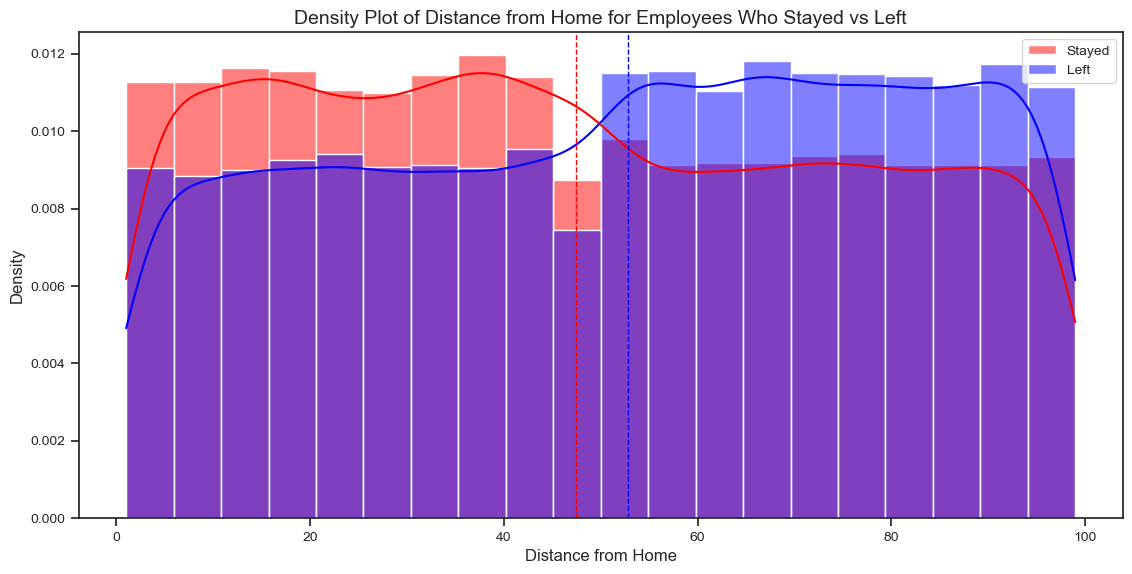

In [49]:
# Iterate through each numerical feature and plot the density plot
for col in groups:
    plt.figure(figsize=(12, 6))

    # Group by 'Attrition' column for the selected numerical feature
    group1 = processed_df[processed_df['Attrition'] == 'Stayed'][col]
    group2 = processed_df[processed_df['Attrition'] == 'Left'][col]

    # Plot the density for each group
    sns.histplot(group1, kde=True, label='Stayed', color='red', bins=20, stat="density", alpha=0.5)
    sns.histplot(group2, kde=True, label='Left', color='blue', bins=20, stat="density", alpha=0.5)

    # Add lines for the means of each group
    plt.axvline(group1.mean(), color='red', linestyle='--', linewidth=1)
    plt.axvline(group2.mean(), color='blue', linestyle='--', linewidth=1)

    # Set the titles and labels
    plt.title(f'Density Plot of {col} for Employees Who Stayed vs Left', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)

    # Show the plot
    plt.show()

These plots show that the longer employees remain at the company, the more likely they are to continue staying. 

Additionally, living closer to the workplace appears to positively influence an employee's decision to stay.

### Chi-Square
Perform Chi-Square test to chack the relation between the category features

In [67]:
chi_square_test_mat = chi_square_matrix(processed_df, processed_df.select_dtypes('category').columns, alpha=0.05)
chi_square_test_mat

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Age Group,Start Age Group
Gender,Gender,,,,,,,,,,,,,,,,,,,
Job Role,"χ²=8.49, p=0.0753",Job Role,,,,,,,,,,,,,,,,,,
Work-Life Balance,"χ²=5.86, p=0.1185","χ²=13.07, p=0.3638",Work-Life Balance,,,,,,,,,,,,,,,,,
Job Satisfaction,"χ²=3.66, p=0.3003","χ²=14.11, p=0.2937","χ²=11.28, p=0.2572",Job Satisfaction,,,,,,,,,,,,,,,,
Performance Rating,"χ²=5.40, p=0.1447","χ²=12.60, p=0.3985","χ²=10.87, p=0.2846","χ²=3.17, p=0.9572",Performance Rating,,,,,,,,,,,,,,,
Number of Promotions,"χ²=5.88, p=0.2084","χ²=15.65, p=0.4776","χ²=8.90, p=0.7112","χ²=16.10, p=0.1869","χ²=21.50, p=0.0435",Number of Promotions,,,,,,,,,,,,,,
Overtime,"χ²=0.00, p=1.0000","χ²=4.57, p=0.3345","χ²=11.59, p=0.0089","χ²=0.98, p=0.8067","χ²=4.46, p=0.2155","χ²=0.90, p=0.9241",Overtime,,,,,,,,,,,,,
Education Level,"χ²=8.40, p=0.0781","χ²=10.17, p=0.8577","χ²=8.87, p=0.7137","χ²=7.78, p=0.8021","χ²=16.48, p=0.1704","χ²=19.94, p=0.2228","χ²=7.60, p=0.1073",Education Level,,,,,,,,,,,,
Marital Status,"χ²=1.56, p=0.4581","χ²=7.31, p=0.5037","χ²=8.08, p=0.2323","χ²=2.47, p=0.8723","χ²=10.57, p=0.1027","χ²=8.15, p=0.4188","χ²=4.36, p=0.1129","χ²=3.64, p=0.8877",Marital Status,,,,,,,,,,,
Number of Dependents,"χ²=2.60, p=0.8576","χ²=16.63, p=0.8640","χ²=23.30, p=0.1794","χ²=22.49, p=0.2109","χ²=17.39, p=0.4964","χ²=23.06, p=0.5163","χ²=6.91, p=0.3296","χ²=33.71, p=0.0899","χ²=7.07, p=0.8530",Number of Dependents,,,,,,,,,,


There is a significant difference between 'Attrition' to the other features